# Task 1: Piccadilly Line with Real Distances

This notebook recreates the Piccadilly line graph from image.png but replaces the letter labels with actual distances between stations in kilometers.

In [27]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
# Create the graph
G = nx.Graph()

# Add stations (nodes)
stations = [
    'Hyde Park Corner',
    'Green Park', 
    'Piccadilly Circus',
    'Leicester Square',
    'Covent Garden',
    'Holborn'
]

G.add_nodes_from(stations)

# Add edges with real distances (in km) based on London Underground map
# Distances approximated using online maps
edges_with_distances = [
    ('Hyde Park Corner', 'Green Park', 0.8),  # ~0.8 km
    ('Green Park', 'Piccadilly Circus', 0.6),  # ~0.6 km
    ('Piccadilly Circus', 'Leicester Square', 0.3),  # ~0.3 km
    ('Leicester Square', 'Covent Garden', 0.4),  # ~0.4 km
    ('Covent Garden', 'Holborn', 0.5)  # ~0.5 km
]

G.add_weighted_edges_from(edges_with_distances)

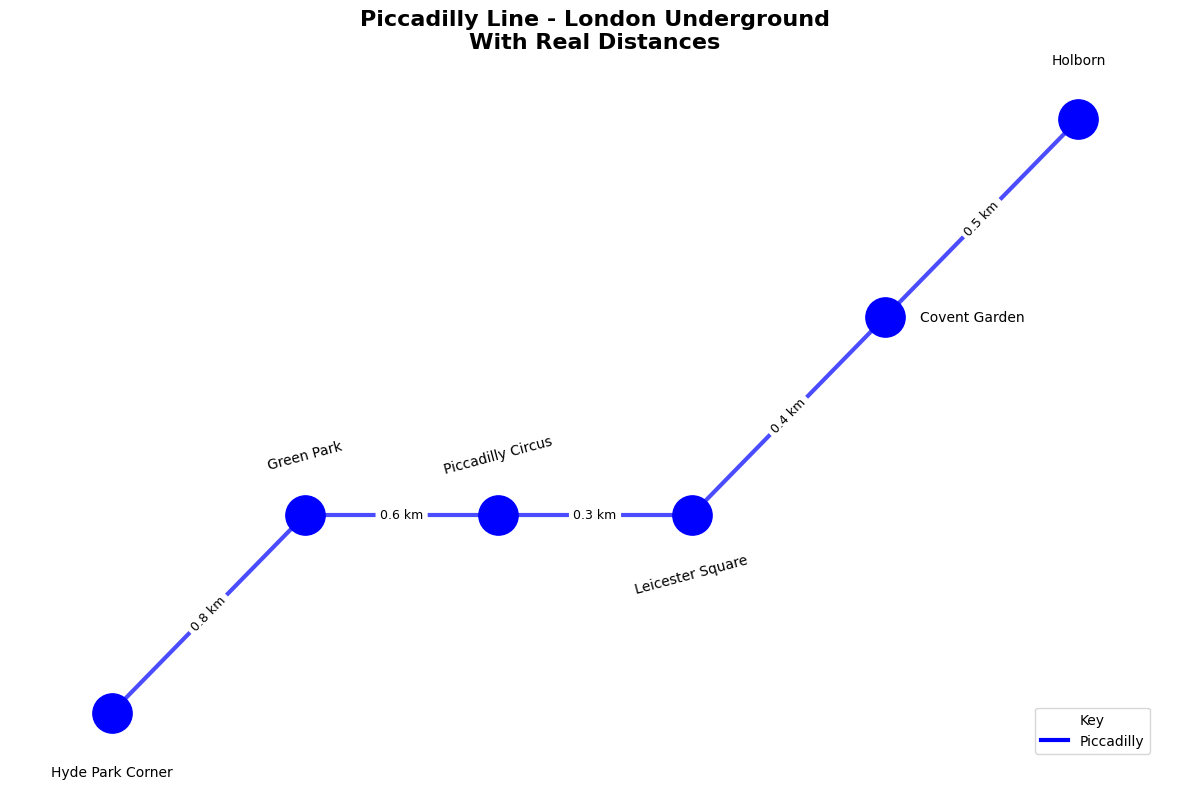

In [29]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Define positions to match the original layout
pos = {
    'Hyde Park Corner': (0, 0),
    'Green Park': (2, 1),
    'Piccadilly Circus': (4, 1),
    'Leicester Square': (6, 1),
    'Covent Garden': (8, 2),
    'Holborn': (10, 3)
}

# List of stations to have their labels tilted
tilted_labels = ['Green Park', 'Piccadilly Circus', 'Leicester Square']

# Function to calculate smart label positions to avoid path overlap
def calculate_label_positions(graph, node_positions, offset_distance=0.3):
    label_positions = {}
    
    for node in graph.nodes():
        x, y = node_positions[node]
        
        # Get all connected nodes to determine path directions
        neighbors = list(graph.neighbors(node))
        
        if not neighbors:
            # Isolated node, place label below
            label_positions[node] = (x, y - offset_distance)
            continue
            
        # Calculate average direction of all edges from this node
        total_dx, total_dy = 0, 0
        for neighbor in neighbors:
            nx, ny = node_positions[neighbor]
            total_dx += nx - x
            total_dy += ny - y
        
        # Normalize the direction
        avg_dx = total_dx / len(neighbors)
        avg_dy = total_dy / len(neighbors)
        
        # Determine label offset based on path direction
        # If path goes up or up-right, place label below
        # If path goes down or down-left, place label above
        # If path is mostly horizontal, place label above or below based on slight vertical component
        
        # Special case for Covent Garden - place label to the right
        if node == 'Covent Garden':
            label_x = x + offset_distance * 3
            label_y = y
        elif avg_dy > 0.1:  # Path goes upward
            # Place label below the node
            label_x = x
            label_y = y - offset_distance
        elif avg_dy < -0.1:  # Path goes downward
            # Place label above the node
            label_x = x
            label_y = y + offset_distance
        else:  # Mostly horizontal path
            if avg_dx > 0:  # Path goes right
                # Place label below to avoid overlap
                label_x = x
                label_y = y - offset_distance
            else:  # Path goes left
                # Place label above
                label_x = x
                label_y = y + offset_distance
        
        label_positions[node] = (label_x, label_y)
    
    return label_positions

# Calculate smart label positions
label_pos = calculate_label_positions(G, pos)

# Draw the network
nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=800)
nx.draw_networkx_edges(G, pos, edge_color='blue', width=3, alpha=0.7)

# Draw labels using the tilted_labels list to set rotation
for node, (x, y) in label_pos.items():
    angle = 15 if node in tilted_labels else 0
    plt.text(x, y, node, fontsize=10, 
            ha='center', va='center', rotation=angle,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor='none'))

# Add edge labels with distances
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f'{v} km' for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=9)

# Add title and legend
plt.title('Piccadilly Line - London Underground\nWith Real Distances', fontsize=16, fontweight='bold')

# Add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='blue', lw=3, label='Piccadilly')]
plt.legend(handles=legend_elements, title='Key', loc='lower right', bbox_to_anchor=(0.98, 0.02))

plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
# Display network information
print("Piccadilly Line Network Information:")
print(f"Number of stations: {G.number_of_nodes()}")
print(f"Number of connections: {G.number_of_edges()}")
print("\nDistances between stations:")
for edge in G.edges(data=True):
    print(f"{edge[0]} ↔ {edge[1]}: {edge[2]['weight']} km")

Piccadilly Line Network Information:
Number of stations: 6
Number of connections: 5

Distances between stations:
Hyde Park Corner ↔ Green Park: 0.8 km
Green Park ↔ Piccadilly Circus: 0.6 km
Piccadilly Circus ↔ Leicester Square: 0.3 km
Leicester Square ↔ Covent Garden: 0.4 km
Covent Garden ↔ Holborn: 0.5 km
